In [21]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from typing import Literal


def fftconvolve(x, y, mode: Literal['full', 'same', 'valid'] = 'full'):
    _len = {'full': len(x) + len(y) - 1,
            'same': max(len(x), len(y)),
            'valid': max(len(x), len(y)) - min(len(x), len(y)) + 1
            }
    # The full operation is taken first, post operation is taken for 'same' and 'valid' (for the signal boundary)
    length = _len['full']

    def _padding_zeros(arr):
        # padding the signals
        return np.pad(arr, (0, length - len(arr)), 'constant')
    _x_pad = _padding_zeros(x)
    _y_pad = _padding_zeros(y)
    c = np.fft.ifft(np.fft.fft(_x_pad)*np.fft.fft(_y_pad))
    if mode == 'full':
        return c.real
    if mode in ['same', 'valid']:
        start_index = int(np.floor((length-_len[mode])/2))
        return c[start_index: start_index + _len[mode]].real

## Test

In [3]:
# Define the test cases
test_cases = [
    # Test case 1: small inputs
    ([1, 2, 3], [4, 5]),
    
    # Test case 2: small inputs with same length
    ([1, 2], [3, 4]),
    
    # Test case 3: small inputs with different lengths
    ([1, 2], [3, 4, 5]),
    
    # Test case 4: larger inputs with same length
    (list(range(10)), list(range(10, 20))),
    
    # Test case 5: larger inputs with different lengths
    (list(range(10)), list(range(20, 30))),
    
    # Test case 6: inputs with negative values
    ([-1, 2, -3, 4, -5], [10, -20]),
    
    # Test case 7: inputs with decimal values
    ([1.0, 2.5, 3.75], [0.5, 1.25]),
    
    # Test case 8: inputs with only one value
    ([5], [10, 20]),
    
    # Test case 9: inputs with only onevalue (same length)
    ([5], [10]),
    
    # Test case 10: inputs with only one value (different lengths)
    ([5], [10, 20, 30]),
    
    # Test case 11: inputs with repeated values
    ([1, 2, 2, 3], [1, 2, 2, 3]),
    
    # Test case 12: inputs with all zeros
    ([0, 0, 0], [0, 0, 0]),
    
    # Test case 13: inputs with only positive values
    ([1, 2, 3, 4], [5, 6, 7, 8]),
    
    # Test case 14: inputs with only negative values
    ([-1, -2, -3, -4], [-5, -6, -7, -8]),
    
    # Test case 15: inputs with alternating positive and negative values
    ([1, -2, 3, -4, 5], [10, -20, 30]),
    
    # Test case 16: inputs with random positive and negative values
    ([4, -2, 6, -3, 8], [10, -5, 7, -2]),

     # Test case 17: inputs with random positive and negative decimal values
    ([1.5, -2.3, 3.7, -4.1], [0.2, -0.5, 0.8]),
    
    # Test case 18: inputs with large values
    ([1000, 2000, 3000], [500, 600, 700]),
    
    # Test case 19: inputs with very small values
    ([1e-6, 2e-6, 3e-6], [4e-6, 5e-6, 6e-6]),
    
    # Test case 20: inputs with very large and very small values
    ([1e6, 2e6, 3e6], [4e-6, 5e-6, 6e-6])
]
# Test the function with each test case
for x, y in test_cases:
    for mode in ['full', 'same', 'valid']:
        # Use fftconvolve function
        my_result = fftconvolve(x, y, mode)
        
        # Use np.convolve function
        np_result = np.convolve(x, y, mode=mode)
        
        # Compare the results
        assert np.allclose(my_result, np_result), f"Error: mode={mode}, x={x}, y={y}, my_result={my_result}, np_result={np_result}"


In [5]:
fftconvolve([1,2,3],[0,1,0.5], 'same')

array([1. , 2.5, 4. ])

In [18]:
fftconvolve([0,0,0,1,1,1,0,0,0,0],[0,0,0,1,1,1,0,0,0,0], 'same')


array([ 4.38245931e-17, -1.40238698e-16,  1.00000000e+00,  2.00000000e+00,
        3.00000000e+00,  2.00000000e+00,  1.00000000e+00,  3.73969861e-16,
        0.00000000e+00,  0.00000000e+00])

In [19]:
np.convolve([0,0,0,1,1,1,0,0,0,0],[0,0,0,1,1,1,0,0,0,0], 'same')

array([0, 0, 1, 2, 3, 2, 1, 0, 0, 0])

## Test no padding

In [58]:

def test_padding(x, y, mode: Literal['full', 'same', 'valid'] = 'full'):
    _len = {'full': len(x) + len(y) - 1,
            'same': max(len(x), len(y)),
            'valid': max(len(x), len(y)) - min(len(x), len(y)) + 1
            }
    # The full operation is taken first, post operation is taken for 'same' and 'valid' (for the signal boundary)
    length = _len['full']

    def _padding_zeros(arr):
        # padding the signals
        return np.pad(arr, (0, length - len(arr)), 'constant')
    _x_pad = _padding_zeros(x)
    _y_pad = _padding_zeros(y)
    print(np.fft.fft(x),np.fft.fft(y),sep='\n')
    print('\n')
    print(np.fft.fft(_x_pad),np.fft.fft(_y_pad),sep='\n')
    print('\n')
    print(np.fft.ifft(np.fft.fft(x)),np.fft.ifft(np.fft.fft(y)),sep='\n')
    print('\n')
    print(np.fft.ifft(np.fft.fft(_x_pad)),np.fft.ifft(np.fft.fft(_y_pad)),sep='\n')
    print('\n')
    print(np.fft.fft(x)*np.fft.fft(y),np.fft.fft(_x_pad)*np.fft.fft(_y_pad),sep='\n')
    

In [59]:
test_padding([1,2,3],[0,1,0.5], 'same')

[ 6. +0.j        -1.5+0.8660254j -1.5-0.8660254j]
[ 1.5 +0.j        -0.75-0.4330127j -0.75+0.4330127j]


[ 6.        +0.j         -0.80901699-3.66546879j  0.30901699+1.67759904j
  0.30901699-1.67759904j -0.80901699+3.66546879j]
[ 1.5      +0.j         -0.0954915-1.24494914j -0.6545085-0.11225699j
 -0.6545085+0.11225699j -0.0954915+1.24494914j]


[1.+0.j 2.+0.j 3.+0.j]
[0. +0.j 1. +0.j 0.5+0.j]


[1.+0.j 2.+0.j 3.+0.j 0.+0.j 0.+0.j]
[0.0000000e+00+0.j 1.0000000e+00+0.j 5.0000000e-01+0.j 0.0000000e+00+0.j
 8.8817842e-17+0.j]


[9. +0.j 1.5+0.j 1.5+0.j]
[ 9.        +0.j         -4.48606798+1.35720614j -0.01393202-1.13269215j
 -0.01393202+1.13269215j -4.48606798-1.35720614j]


In [40]:
def fake_fftconvolve(x, y):
    ''' Perso method to do FFT convolution'''
    fftx = np.fft.fft(x)
    ffty = np.fft.fft(y)
    fftc = fftx * ffty
    c = np.fft.ifft(fftc)
    return c.real


C:\Users\user\AppData\Local\Temp\ipykernel_8904\1564035967.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('conv1','conv2')


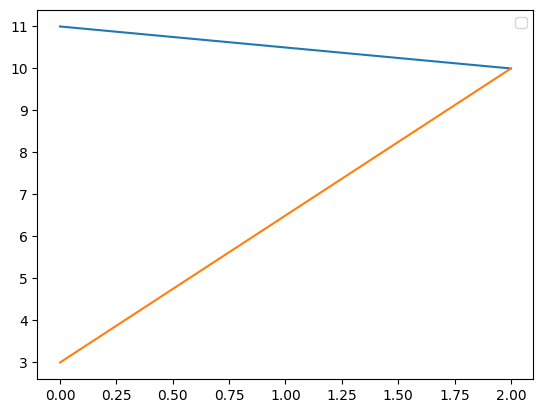

In [53]:
conv1=fake_fftconvolve([1, 2], [3, 4])
conv2=fftconvolve([1, 2], [3, 4], 'same')
plt.plot(np.linspace(0,2,len(conv1)),conv1)
plt.plot(np.linspace(0,2,len(conv2)),conv2)
plt.legend('conv1','conv2')
plt.show()